<a href="https://colab.research.google.com/github/saptarshidatta96/MTech_Sem3/blob/main/CV_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

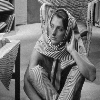

In [28]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

img = cv2.imread("/content/barbara.jpg",0) 
img = cv2.resize(img, (100, 100), interpolation= cv2.INTER_LINEAR)
img.shape
cv2_imshow(img)

In [39]:
def DFT_1D(fx):
    fx = np.asarray(fx, dtype=complex)
    M = fx.shape[0]
    fu = fx.copy()

    for i in range(M):
        u = i
        sum = 0
        for j in range(M):
            x = j
            tmp = fx[x]*np.exp(-2j*np.pi*x*u*np.divide(1, M, dtype=complex))
            sum += tmp
        # print(sum)
        fu[u] = sum
    # print(fu)

    return fu


def DFT_2D(fu):
    h, w = fu.shape[0], fu.shape[1]

    fx = np.zeros(fu.shape, dtype=complex)

    if len(fu.shape) == 2:
        for i in range(h):
            fx[i, :] = DFT_1D(fu[i, :])

        for i in range(w):
            fx[:, i] = DFT_1D(fx[:, i])

    fx = np.real(fx)
    return fx

In [40]:
def inverseDFT_1D(fu):
    fu = np.asarray(fu, dtype=complex)
    M = fu.shape[0]
    fx = np.zeros(M, dtype=complex)

    for i in range(M):
        x = i
        sum = 0
        for j in range(M):
            u = j
            tmp = fu[u]*np.exp(2j*np.pi*x*u*np.divide(1, M, dtype=complex))
            sum += tmp
        fx[x] = np.divide(sum, M, dtype=complex)

    return fx

def inverseDFT_2D(fu):
    h, w = fu.shape[0], fu.shape[1]

    fx = np.zeros(fu.shape, dtype=complex)

    if len(fu.shape) == 2:
        for i in range(h):
            fx[i, :] = inverseDFT_1D(fu[i, :])

        for i in range(w):
            fx[:, i] = inverseDFT_1D(fx[:, i])


    fx = np.real(fx)
    return fx

In [46]:
fx = DFT_2D(img)

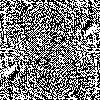

In [47]:
cv2_imshow(fx)

In [43]:
def shift(F):
    ''' this shifts the centre of FFT of images/2-d signals'''
    M, N = F.shape
    R1, R2 = F[0: M//2, 0: N//2], F[M//2: M, 0: N//2]
    R3, R4 = F[0: M//2, N//2: N], F[M//2: M, N//2: N]
    print(R1.shape, R2.shape, R3.shape, R4.shape)
    sF = np.zeros(F.shape,dtype = F.dtype)
    sF[M//2: M, N//2: N], sF[0: M//2, 0: N//2] = R1, R4
    sF[M//2: M, 0: N//2], sF[0: M//2, N//2: N]= R3, R2
    return sF

In [53]:
sF = shift(fx)

(50, 50) (50, 50) (50, 50) (50, 50)


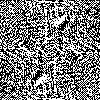

In [54]:
cv2_imshow(sF)

In [66]:
rows, cols = img.shape
crow, ccol = int(rows / 2), int(cols / 2)

mask = np.ones((rows, cols), np.uint8)
r = 10
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
mask[mask_area] = 0

In [67]:
mask.shape

(100, 100)

In [68]:
fshift = sF * mask

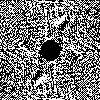

In [69]:
cv2_imshow(fshift)